<a href="https://colab.research.google.com/github/Sergey854223/labs_of_ii/blob/main/lab4/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [96]:
import pandas as pd # загружаем библиотеку и для простоты обращения в коде называем её сокращенно pd

In [97]:
import matplotlib.pyplot as plt # загружаем библиотеку и для простоты обращения в коде называем её сокращенно plt
# указываем, чтобы картинки отображались прямо в ноутбуке 
%matplotlib inline 

In [98]:
%%capture
!wget https://www.dropbox.com/s/afwb0tnqm9izxha/predict_house_price_training_data.xlsx
!wget https://www.dropbox.com/s/sur2avqf4n5f4az/predict_house_price_test_data.xlsx

In [99]:
training_data = pd.read_csv('Hunger.csv')
training_data.head(10)

,index,unique_id,name,district,sex,age,volunteer,career,rating,rating_ave,rating_rand,survival_days,rank,winner,alliance
0,0,1,Marvel,1,0,17,1,1,9.0,9,9,9,8,0,1.0
1,1,2,Glimmer,1,1,17,1,1,10.0,10,10,5,11,0,1.0
2,2,3,Cato,2,0,18,1,1,10.0,10,10,17,3,0,1.0
3,3,4,Clove,2,1,15,1,1,10.0,10,10,12,6,0,1.0
4,4,5,unknown,3,0,15,1,1,NaN,9,10,8,9,0,1.0
5,5,6,unknown,3,1,16,0,0,NaN,5,4,1,14,0,NaN
6,6,7,unknown,4,0,13,1,1,NaN,9,9,1,14,0,NaN
7,7,8,unknown,4,1,16,1,1,NaN,9,8,5,12,0,1.0
8,8,9,unknown,5,0,15,0,0,NaN,5,3,1,14,0,NaN
9,9,10,Foxface,5,1,15,0,0,5.0,5,5,15,4,0,0.0


In [100]:
training_data.shape

(24, 15)

In [101]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          24 non-null     int64  
 1   unique_id      24 non-null     int64  
 2   name           24 non-null     object 
 3   district       24 non-null     int64  
 4   sex            24 non-null     int64  
 5   age            24 non-null     int64  
 6   volunteer      24 non-null     int64  
 7   career         24 non-null     int64  
 8   rating         9 non-null      float64
 9   rating_ave     24 non-null     int64  
 10  rating_rand    24 non-null     int64  
 11  survival_days  24 non-null     int64  
 12  rank           24 non-null     int64  
 13  winner         24 non-null     int64  
 14  alliance       13 non-null     float64
dtypes: float64(2), int64(12), object(1)
memory usage: 2.9+ KB


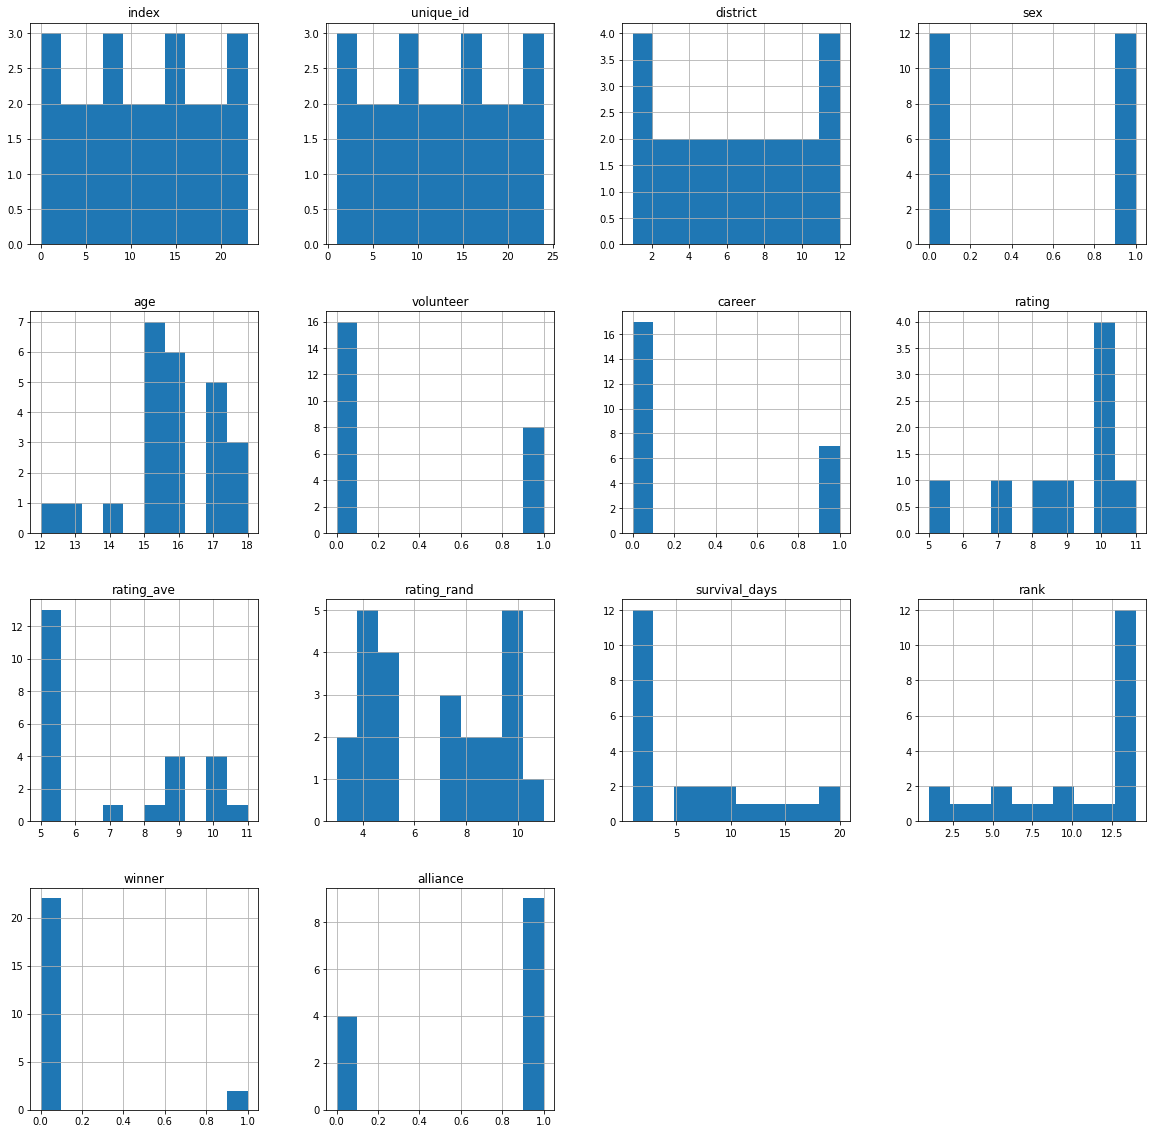

In [102]:

training_data.hist(figsize=(20, 20));

In [103]:

training_data.head()

,index,unique_id,name,district,sex,age,volunteer,career,rating,rating_ave,rating_rand,survival_days,rank,winner,alliance
0,0,1,Marvel,1,0,17,1,1,9.0,9,9,9,8,0,1.0
1,1,2,Glimmer,1,1,17,1,1,10.0,10,10,5,11,0,1.0
2,2,3,Cato,2,0,18,1,1,10.0,10,10,17,3,0,1.0
3,3,4,Clove,2,1,15,1,1,10.0,10,10,12,6,0,1.0
4,4,5,unknown,3,0,15,1,1,NaN,9,10,8,9,0,1.0


In [104]:
training_data = training_data.drop('name', axis=1)

In [105]:
training_data = training_data.drop('alliance', axis=1)


KeyError: ignored

In [107]:
training_data = training_data.drop('rating', axis=1)

In [82]:
training_data.head()
     

,index,unique_id,district,sex,age,volunteer,career,rating,rating_ave,rating_rand,survival_days,rank,winner,alliance
0,0,1,1,0,17,1,1,9.0,9,9,9,8,0,1.0
1,1,2,1,1,17,1,1,10.0,10,10,5,11,0,1.0
2,2,3,2,0,18,1,1,10.0,10,10,17,3,0,1.0
3,3,4,2,1,15,1,1,10.0,10,10,12,6,0,1.0
4,4,5,3,0,15,1,1,NaN,9,10,8,9,0,1.0


In [108]:
training_values = training_data['age']

In [109]:
training_points = training_data.drop('age', axis=1)

In [110]:
training_points.head()

,index,unique_id,district,sex,volunteer,career,rating_ave,rating_rand,survival_days,rank,winner
0,0,1,1,0,1,1,9,9,9,8,0
1,1,2,1,1,1,1,10,10,5,11,0
2,2,3,2,0,1,1,10,10,17,3,0
3,3,4,2,1,1,1,10,10,12,6,0
4,4,5,3,0,1,1,9,10,8,9,0


In [111]:
training_points.shape

(24, 11)

In [112]:

from sklearn import linear_model, ensemble
linear_regression_model = linear_model.LinearRegression() # создаем модель
random_forest_model = ensemble.RandomForestRegressor(random_state=123)

In [113]:
linear_regression_model.fit(training_points, training_values)

LinearRegression()

In [114]:
random_forest_model.fit(training_points, training_values)

RandomForestRegressor(random_state=123)

In [139]:
test_data = pd.read_csv('Hunger.csv')
test_data.head(10)

,index,unique_id,name,district,sex,age,volunteer,career,rating,rating_ave,rating_rand,survival_days,rank,winner,alliance
0,0,1,Marvel,1,0,17,1,1,9.0,9,9,9,8,0,1.0
1,1,2,Glimmer,1,1,17,1,1,10.0,10,10,5,11,0,1.0
2,2,3,Cato,2,0,18,1,1,10.0,10,10,17,3,0,1.0
3,3,4,Clove,2,1,15,1,1,10.0,10,10,12,6,0,1.0
4,4,5,unknown,3,0,15,1,1,NaN,9,10,8,9,0,1.0
5,5,6,unknown,3,1,16,0,0,NaN,5,4,1,14,0,NaN
6,6,7,unknown,4,0,13,1,1,NaN,9,9,1,14,0,NaN
7,7,8,unknown,4,1,16,1,1,NaN,9,8,5,12,0,1.0
8,8,9,unknown,5,0,15,0,0,NaN,5,3,1,14,0,NaN
9,9,10,Foxface,5,1,15,0,0,5.0,5,5,15,4,0,0.0


In [140]:
test_data.shape

(24, 15)

In [141]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          24 non-null     int64  
 1   unique_id      24 non-null     int64  
 2   name           24 non-null     object 
 3   district       24 non-null     int64  
 4   sex            24 non-null     int64  
 5   age            24 non-null     int64  
 6   volunteer      24 non-null     int64  
 7   career         24 non-null     int64  
 8   rating         9 non-null      float64
 9   rating_ave     24 non-null     int64  
 10  rating_rand    24 non-null     int64  
 11  survival_days  24 non-null     int64  
 12  rank           24 non-null     int64  
 13  winner         24 non-null     int64  
 14  alliance       13 non-null     float64
dtypes: float64(2), int64(12), object(1)
memory usage: 2.9+ KB


In [142]:
test_data.head()
     

,index,unique_id,name,district,sex,age,volunteer,career,rating,rating_ave,rating_rand,survival_days,rank,winner,alliance
0,0,1,Marvel,1,0,17,1,1,9.0,9,9,9,8,0,1.0
1,1,2,Glimmer,1,1,17,1,1,10.0,10,10,5,11,0,1.0
2,2,3,Cato,2,0,18,1,1,10.0,10,10,17,3,0,1.0
3,3,4,Clove,2,1,15,1,1,10.0,10,10,12,6,0,1.0
4,4,5,unknown,3,0,15,1,1,NaN,9,10,8,9,0,1.0


In [143]:
test_data = test_data.dropna()

In [144]:
test_data = test_data.drop(['name'],axis = 1)

In [145]:
test_data.head()

,index,unique_id,district,sex,age,volunteer,career,rating,rating_ave,rating_rand,survival_days,rank,winner,alliance
0,0,1,1,0,17,1,1,9.0,9,9,9,8,0,1.0
1,1,2,1,1,17,1,1,10.0,10,10,5,11,0,1.0
2,2,3,2,0,18,1,1,10.0,10,10,17,3,0,1.0
3,3,4,2,1,15,1,1,10.0,10,10,12,6,0,1.0
9,9,10,5,1,15,0,0,5.0,5,5,15,4,0,0.0


In [147]:
training_points.head()

,index,unique_id,district,sex,volunteer,career,rating_ave,rating_rand,survival_days,rank,winner
0,0,1,1,0,1,1,9,9,9,8,0
1,1,2,1,1,1,1,10,10,5,11,0
2,2,3,2,0,1,1,10,10,17,3,0
3,3,4,2,1,1,1,10,10,12,6,0
4,4,5,3,0,1,1,9,10,8,9,0


In [148]:
test_value = test_data['age']
test_points = test_data.drop('age',axis=1)
test_points.head()

,index,unique_id,district,sex,volunteer,career,rating,rating_ave,rating_rand,survival_days,rank,winner,alliance
0,0,1,1,0,1,1,9.0,9,9,9,8,0,1.0
1,1,2,1,1,1,1,10.0,10,10,5,11,0,1.0
2,2,3,2,0,1,1,10.0,10,10,17,3,0,1.0
3,3,4,2,1,1,1,10.0,10,10,12,6,0,1.0
9,9,10,5,1,0,0,5.0,5,5,15,4,0,0.0


In [150]:
test_points = test_points.drop('alliance',axis=1)




KeyError: ignored

In [151]:
test_points = test_points.drop('rating',axis=1)

In [152]:
list(test_points)==list(training_points)

True

In [153]:
test_predictions_linear = linear_regression_model.predict(test_points)
test_predictions_random_forest = random_forest_model.predict(test_points)

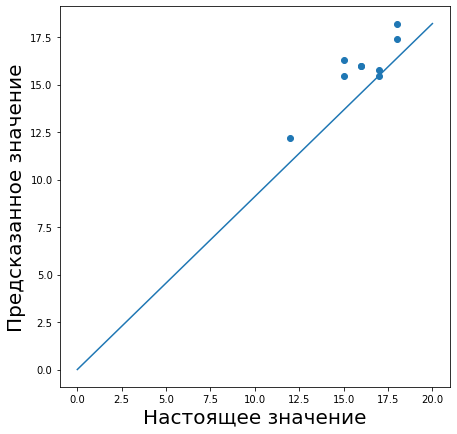

In [157]:
plt.figure(figsize=(7, 7))
plt.scatter(test_value, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_values)], [0, max(test_predictions_linear)])  # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящее значение', fontsize=20)
plt.ylabel('Предсказанное значение', fontsize=20);

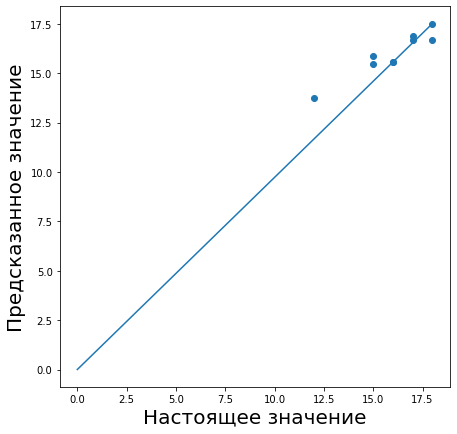

In [160]:
plt.figure(figsize=(7, 7))
plt.scatter(test_value, test_predictions_random_forest) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, max(test_value)], [0, max(test_predictions_random_forest)]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Настоящее значение', fontsize=20)
plt.ylabel('Предсказанное значение', fontsize=20);

In [161]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [163]:
mean_absolute_error_linear_model = mean_absolute_error(test_value, test_predictions_linear)
mean_squared_error_linear_model = mean_squared_error(test_value, test_predictions_linear)
r2_score_linear_model = r2_score(test_value, test_predictions_linear)

In [165]:
mean_absolute_error_random_forest_model = mean_absolute_error(test_value, test_predictions_random_forest)
mean_squared_error_random_forest_model = mean_squared_error(test_value, test_predictions_random_forest)
r2_score_random_forest_model = r2_score(test_value, test_predictions_random_forest)
     

In [167]:
print("MAE: {0:7.2f}, RMSE: {1:7.2f}, R2: {2:7.2f} for linear model".format(
        mean_absolute_error(test_value, test_predictions_linear), 
        mean_squared_error(test_value, test_predictions_linear)**0.5, r2_score_linear_model))

print("MAE: {0:7.2f}, RMSE: {1:7.2f},  R2: {2:7.2f} for random forest model".format(
       mean_absolute_error(test_value, test_predictions_random_forest), 
       mean_squared_error(test_value, test_predictions_random_forest)**0.5, r2_score_random_forest_model))
     

MAE:    0.62, RMSE:    0.84, R2:    0.78 for linear model
MAE:    0.68, RMSE:    0.84,  R2:    0.77 for random forest model
